In [ ]:
import pandas as pd
import numpy as np

# Data loading using ucimlrepo Python library

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [ ]:
# X contains all feature columns (this is your full dataset)
df1 = online_retail.data.features.copy()

df1.to_csv("online_retail_cached.csv", index=False)
from google.colab import files
files.download("online_retail_cached.csv")

# Display first 5 rows to confirm structure
df1.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [ ]:
df1.shape

(541909, 6)

The UnitPrice feature is present but key identifier features like InvoiceNo and StockCode are absent.:


# Importing the dataset dowloaded in CSV format from the UCI repository

In [ ]:
file_id = "1JTOd8Tcz65bdEC2djaqbImz_XYcVhTkK"
csv_url = f"https://drive.google.com/uc?export=download&id={file_id}"

df2 = pd.read_csv(csv_url, encoding="latin1")

# Check that it loaded correctly
print(df2.shape)
print(df2.columns)
df2.head()


(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'InvoiceTime', 'CustomerID', 'Country'],
      dtype='object')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,08:26:00,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,08:26:00,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,08:26:00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,08:26:00,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,08:26:00,17850.0,United Kingdom


Here, the fetures like InvoiceNo and StockCode are present but UnitPrice is absent.

# Integration of the two imported datasets to get a complete transactional dataset

In [ ]:
df= df2

In [ ]:
df['UnitPrice']= df1['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,CustomerID,Country,UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,08:26:00,17850.0,United Kingdom,2.55
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,08:26:00,17850.0,United Kingdom,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,08:26:00,17850.0,United Kingdom,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,08:26:00,17850.0,United Kingdom,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,08:26:00,17850.0,United Kingdom,3.39


Above is the complete dataset with all the necessary features present.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   InvoiceTime  541909 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   UnitPrice    541909 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


# Creation of Transaction Timestamp

In [ ]:
df['InvoiceDateTime'] = pd.to_datetime(
    df['InvoiceDate'] + ' ' + df['InvoiceTime'],
    format='%d-%m-%Y %H:%M:%S',
    errors='coerce'
)


In [ ]:
df[['InvoiceDate', 'InvoiceTime', 'InvoiceDateTime']].head()


,InvoiceDate,InvoiceTime,InvoiceDateTime
0,01-12-2010,08:26:00,2010-12-01 08:26:00
1,01-12-2010,08:26:00,2010-12-01 08:26:00
2,01-12-2010,08:26:00,2010-12-01 08:26:00
3,01-12-2010,08:26:00,2010-12-01 08:26:00
4,01-12-2010,08:26:00,2010-12-01 08:26:00


# Data Cleaning

Removal of Cancelled Orders


In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


Invalid Quantity Filtering

In [ ]:
df = df[df['Quantity'] > 0]


Invalid Price Filtering

In [ ]:
df = df[df['UnitPrice'] > 0]


In [ ]:
df = df.dropna(subset=['CustomerID']) #rows with null CustomerID are being dropped


In [ ]:
df = df.drop_duplicates() #Duplicates are being dropped


# Revenue feature creation

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df[['Quantity', 'UnitPrice', 'Revenue']].head()


,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


# Missing Value Handling

In [ ]:
df.replace(" ", np.nan)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,CustomerID,Country,UnitPrice,InvoiceDateTime,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,08:26:00,17850.0,United Kingdom,2.55,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,08:26:00,17850.0,United Kingdom,3.39,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,08:26:00,17850.0,United Kingdom,2.75,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,08:26:00,17850.0,United Kingdom,3.39,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,08:26:00,17850.0,United Kingdom,3.39,2010-12-01 08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011,12:50:00,12680.0,France,0.85,2011-12-09 12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011,12:50:00,12680.0,France,2.10,2011-12-09 12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011,12:50:00,12680.0,France,4.15,2011-12-09 12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011,12:50:00,12680.0,France,4.15,2011-12-09 12:50:00,16.60


In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
InvoiceTime,0
CustomerID,0
Country,0
UnitPrice,0
InvoiceDateTime,0


No missing values present

# Glimpse of the final clean dataset

In [ ]:
print("Final Rows After Cleaning:", df.shape[0])
print("Unique Customers:", df['CustomerID'].nunique())
print("Total Revenue:", df['Revenue'].sum())


Final Rows After Cleaning: 392692
Unique Customers: 4338
Total Revenue: 8887208.894


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        392692 non-null  object        
 1   StockCode        392692 non-null  object        
 2   Description      392692 non-null  object        
 3   Quantity         392692 non-null  int64         
 4   InvoiceDate      392692 non-null  object        
 5   InvoiceTime      392692 non-null  object        
 6   CustomerID       392692 non-null  float64       
 7   Country          392692 non-null  object        
 8   UnitPrice        392692 non-null  float64       
 9   InvoiceDateTime  392692 non-null  datetime64[ns]
 10  Revenue          392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 36.0+ MB


In [ ]:
df.shape

(392692, 11)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,CustomerID,Country,UnitPrice,InvoiceDateTime,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,08:26:00,17850.0,United Kingdom,2.55,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,08:26:00,17850.0,United Kingdom,3.39,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,08:26:00,17850.0,United Kingdom,2.75,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,08:26:00,17850.0,United Kingdom,3.39,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,08:26:00,17850.0,United Kingdom,3.39,2010-12-01 08:26:00,20.34


# Meta Data

In [ ]:
df[['Quantity', 'UnitPrice', 'Revenue']].describe().round(2)

,Quantity,UnitPrice,Revenue
count,392692.00,392692.00,392692.00
mean,13.12,3.13,22.63
std,180.49,22.24,311.10
min,1.00,0.00,0.00
25%,2.00,1.25,4.95
50%,6.00,1.95,12.45
75%,12.00,3.75,19.80
max,80995.00,8142.75,168469.60


In [ ]:
# Step 1: Construct customer-level purchase behaviour metrics
customer_level_metrics = (
    df.groupby('CustomerID')
      .agg(
          purchase_frequency=('InvoiceNo', 'nunique'),
          total_spend=('Revenue', 'sum')
      )
)
customer_level_metrics

,purchase_frequency,total_spend
CustomerID,,
12346.0,1,77183.60
12347.0,7,4310.00
12348.0,4,1797.24
12349.0,1,1757.55
12350.0,1,334.40
...,...,...
18280.0,1,180.60
18281.0,1,80.82
18282.0,2,178.05


In [ ]:
# Step 2: Compute descriptive statistics for customer behaviour
customer_descriptive_stats = (
    customer_level_metrics
        .describe()
        .loc[['mean', '50%', 'std', 'min', 'max']]
        .rename(index={'50%': 'median'})
        .round(2)
)

customer_descriptive_stats


,purchase_frequency,total_spend
mean,4.27,2048.69
median,2.00,668.57
std,7.70,8985.23
min,1.00,3.75
max,209.00,280206.02


In [ ]:
# Save as HTML
customer_descriptive_stats.to_html("customer_descriptive_stats.html")

# Download
from google.colab import files
files.download("customer_descriptive_stats.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To understand customer purchasing behaviour, transactional data was aggregated at the customer level. Descriptive statistics were then computed for purchase frequency and total monetary value to assess central tendency and dispersion.

The results indicate substantial heterogeneity in customer behaviour, with standard deviations significantly exceeding the mean for both frequency and monetary value. This confirms a highly skewed distribution in which a small subset of customers contributes disproportionately to total revenue. These characteristics justify the application of behaviour-based segmentation techniques such as RFM analysis

In [ ]:
total_transactions = df.shape[0]
total_customers = df['CustomerID'].nunique()
total_revenue = df['Revenue'].sum()
avg_order_value = df.groupby('InvoiceNo')['Revenue'].sum().mean()

print("Total Transactions:", total_transactions)
print("Total Unique Customers:", total_customers)
print("Total Revenue (£):", round(total_revenue, 2))
print("Average Order Value (£):", round(avg_order_value, 2))


Total Transactions: 392692
Total Unique Customers: 4338
Total Revenue (£): 8887208.89
Average Order Value (£): 479.56


# EDA


In [ ]:
import matplotlib.pyplot as plt
df['Month'] = df['InvoiceDateTime'].dt.to_period('M')

**Country-Wise Revenue Distribution**

In [ ]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

country_revenue.head(10)


,Revenue
Country,
United Kingdom,7285024.644
Netherlands,285446.340
EIRE,265262.460
Germany,228678.400
France,208934.310
Australia,138453.810
Spain,61558.560
Switzerland,56443.950
Belgium,41196.340


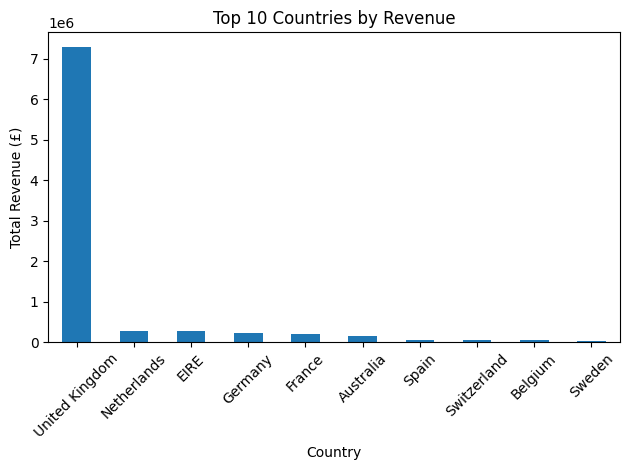

In [ ]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure()
country_revenue.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Country-wise percentage contribution to revenue

In [ ]:
country_revenue_pct = (country_revenue / total_revenue) * 100
country_revenue_pct.head(10)


,Revenue
Country,
United Kingdom,81.972020
Netherlands,3.211878
EIRE,2.984767
Germany,2.573118
France,2.350955
Australia,1.557900
Spain,0.692665
Switzerland,0.635114
Belgium,0.463546


**Monthly Revenue Trend**

In [ ]:
df['Month'] = df['InvoiceDateTime'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()

monthly_revenue


,Revenue
Month,
2010-12,570422.730
2011-01,568101.310
2011-02,446084.920
2011-03,594081.760
2011-04,468374.331
2011-05,677355.150
2011-06,660046.050
2011-07,598962.901
2011-08,644051.040


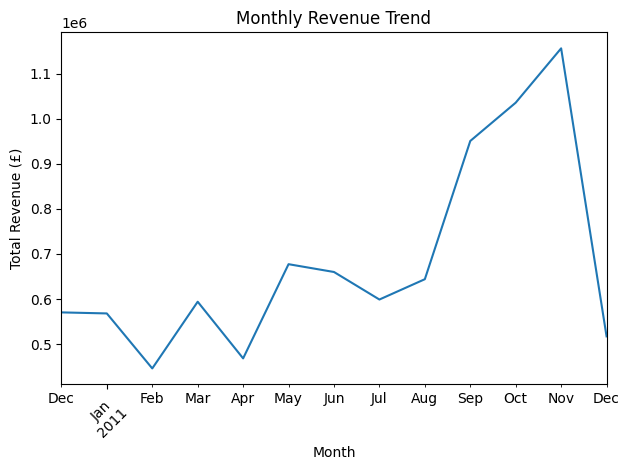

In [ ]:
monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure()
monthly_revenue.plot(kind='line')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Top Products and Revenue Distribution**

In [ ]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

top_products


,Revenue
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,100392.10
JUMBO BAG RED RETROSPOT,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68785.23
ASSORTED COLOUR BIRD ORNAMENT,56413.03
Manual,53419.93


# RFM

**Customer Purchase Frequency Distribution**

In [ ]:
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

customer_frequency.describe()


,InvoiceNo
count,4338.000000
mean,4.272015
std,7.697998
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,209.000000


In [ ]:
customer_frequency.sort_values(ascending=False).head(10)


,InvoiceNo
CustomerID,
12748.0,209
14911.0,201
17841.0,124
13089.0,97
14606.0,93
15311.0,91
12971.0,86
14646.0,73
16029.0,63


**Customer Monetary Value Distribution (top 10)**

In [ ]:
customer_monetary = df.groupby('CustomerID')['Revenue'].sum()

customer_monetary.describe()


,Revenue
count,4338.000000
mean,2048.688081
std,8985.230220
min,3.750000
25%,306.482500
50%,668.570000
75%,1660.597500
max,280206.020000


In [ ]:
customer_monetary.sort_values(ascending=False).head(10)


,Revenue
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194390.79
16446.0,168472.50
14911.0,143711.17
12415.0,124914.53
14156.0,117210.08
17511.0,91062.38
16029.0,80850.84


In [ ]:
fm_df = pd.DataFrame({
    'Frequency': customer_frequency,
    'Monetary': customer_monetary
})

fm_df.corr()


,Frequency,Monetary
Frequency,1.00000,0.55278
Monetary,0.55278,1.00000


**Frequency vs Monetary Relationship**

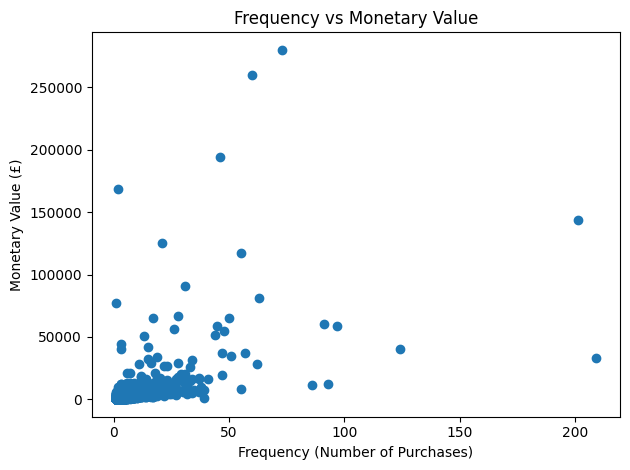

In [ ]:
fm_df = pd.DataFrame({
    'Frequency': customer_frequency,
    'Monetary': customer_monetary
})

plt.figure()
plt.scatter(fm_df['Frequency'], fm_df['Monetary'])
plt.title("Frequency vs Monetary Value")
plt.xlabel("Frequency (Number of Purchases)")
plt.ylabel("Monetary Value (£)")
plt.tight_layout()
plt.show()


In [ ]:
df[['CustomerID', 'InvoiceNo', 'InvoiceDateTime', 'Revenue']].head()


,CustomerID,InvoiceNo,InvoiceDateTime,Revenue
0,17850.0,536365,2010-12-01 08:26:00,15.30
1,17850.0,536365,2010-12-01 08:26:00,20.34
2,17850.0,536365,2010-12-01 08:26:00,22.00
3,17850.0,536365,2010-12-01 08:26:00,20.34
4,17850.0,536365,2010-12-01 08:26:00,20.34


In [ ]:
# Reference date = one day after the last transaction date
reference_date = df['InvoiceDateTime'].max() + pd.Timedelta(days=1)

reference_date


Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDateTime': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                        # Frequency
    'Revenue': 'sum'                                               # Monetary
}).reset_index()

# Rename columns properly
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [ ]:
rfm.shape


(4338, 4)

In [ ]:
rfm.describe()


,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2048.688081
std,1721.808492,100.014169,7.697998,8985.230220
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,306.482500
50%,15299.500000,51.000000,2.000000,668.570000
75%,16778.750000,142.000000,5.000000,1660.597500
max,18287.000000,374.000000,209.000000,280206.020000


In [ ]:
rfm.sort_values('Monetary', ascending=False).head(10)


,CustomerID,Recency,Frequency,Monetary
1689,14646.0,2,73,280206.02
4201,18102.0,1,60,259657.30
3728,17450.0,8,46,194390.79
3008,16446.0,1,2,168472.50
1879,14911.0,1,201,143711.17
55,12415.0,24,21,124914.53
1333,14156.0,10,55,117210.08
3771,17511.0,3,31,91062.38
2702,16029.0,39,63,80850.84
0,12346.0,326,1,77183.60


In [ ]:
rfm[['Recency', 'Frequency', 'Monetary']].skew()


,0
Recency,1.246048
Frequency,12.067031
Monetary,19.339368


In [ ]:
rfm.to_csv("rfm_raw.csv", index=False)

from google.colab import files
files.download("rfm_raw.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rfm.sort_values('Monetary', ascending=False).head()


,CustomerID,Recency,Frequency,Monetary
1689,14646.0,2,73,280206.02
4201,18102.0,1,60,259657.30
3728,17450.0,8,46,194390.79
3008,16446.0,1,2,168472.50
1879,14911.0,1,201,143711.17


The RFM (Recency, Frequency, Monetary) framework is a behaviour-based segmentation technique particularly suitable for transactional retail data.

* Recency captures customer engagement and churn risk

* Frequency reflects purchase regularity and loyalty

* Monetary value represents revenue contribution

Unlike demographic segmentation, RFM directly links customer behaviour to business value, making it highly actionable for targeted marketing strategies.

# Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only RFM numerical columns
rfm_values = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_values)

rfm_scaled[:5]


array([[ 2.33457414, -0.4250965 ,  8.36301037],
       [-0.90534032,  0.3544168 ,  0.2516989 ],
       [-0.17535959, -0.03533985, -0.02798783],
       [-0.73534481, -0.4250965 , -0.03240559],
       [ 2.17457836, -0.4250965 , -0.19081155]])

Since the RFM variables are measured on different scales (days, counts, currency), standardisation is required prior to clustering to prevent dominance of high-magnitude variables. Z-score normalisation ensures equal contribution of each feature in the distance-based K-Means algorithm.

# K-means Clustering

**Elbow Method for Optimal k**

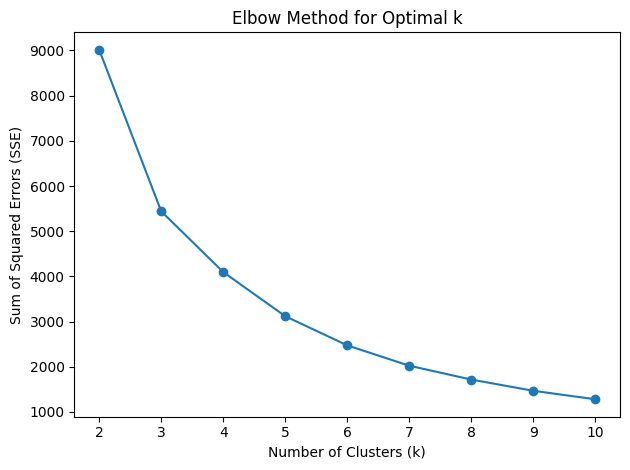

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure()
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_range)
plt.tight_layout()
plt.show()


In [ ]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)



In [ ]:
rfm['Cluster'].value_counts()


,count
Cluster,
1,3230
0,1082
2,26


In [ ]:
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'CustomerCount'})

cluster_profile


,Recency,Frequency,Monetary,CustomerCount
Cluster,,,,
0,247.106285,1.582255,629.663689,1082
1,41.454180,4.672755,1849.670202,3230
2,6.038462,66.423077,85826.078077,26


In [ ]:
rfm.to_csv("rfm_with_clusters_k3.csv", index=False)

from google.colab import files
files.download("rfm_with_clusters_k3.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This notebook is fully reproducible and can be executed end-to-end without modification. All figures and numerical outputs presented in the accompanying report are generated directly from this notebook.